In [1]:
import numpy as np 

# Question 1

# Pseudo Code

1) A class Agent is created which taked dimensions of the environment as input

2) create_env is the function which creates the enivronment. Lion is located in the middle of the environment and adjacent sides 
   of lion has heat. lion's state is denoted with (-10) value and the heat states are defined by (-5) value. Home is located the    the extreme end of the environment and is defined by (+20) value. 
   
3) take_action if the function which takes current position of the agent as parameter. It checks all possible actions from current state. If any of the possible actions lead to the heat state, then it remove that action from the list of all possible action. After all the checks any random action is choosed from the list. And in the process of choosing the actions, if any of the actions from current state will lead the agent to home, then only that action is taken and the loop is ended.

4) move function will take action from current state recurssively until agent reaches home.

# Note:
Agent will keep howring untill he reaches home.. so run this program at your own risk...

In [85]:
class Agent:
    
    def __init__(self,n,m):
        self.n = n
        self.m = m
    
    def create_env(self):
        '''
        This function creates the enironment.
        lion is placed at middle of the environment and 
        '''

        self.env = np.zeros((self.n,self.m))

        self.lion = (int(self.n/2),int(self.m/2))
        self.heat = [(self.lion[0]-1,self.lion[1]),\
                     (self.lion[0]+1,self.lion[1]),\
                     (self.lion[0],self.lion[1]+1),\
                     (self.lion[0],self.lion[1]-1)]

        self.env[self.lion] = -10
        for i in self.heat:
            self.env[i] = -5
        self.home = (self.n-1,self.m-1)
        self.env[self.home] = 20
        
    def take_action(self,pos):
    
        total_actions = [0,1,2,3] # 0:left,1:right,2:up,3:down
        reached_home = False
        for i,j in enumerate([(pos[0]-1,pos[1]),\
                              (pos[0]+1,pos[1]),\
                              (pos[0],pos[1]+1),\
                              (pos[0],pos[1]-1)]):
            if j == self.home:
                reached_home = True
                break
            if (j == self.lion) or (j in self.heat):
                total_actions.remove(i)

        if reached_home:
            action = i
            return action,True
        action = np.random.choice(total_actions)
        return action,False

    def move(self,pos):

        action,reached_home = self.take_action(pos)
        if action == 0:
            pos =  (pos[0]-1,pos[1])
        elif action == 1:
            pos = (pos[0]+1,pos[1])
        elif action ==2:
            pos = (pos[0],pos[1]+1)
        else:
            pos = (pos[0],pos[1]-1)
        if not reached_home:
            self.move(pos)
        else:
            print('Reahced home')

In [86]:
p = Agent(4,5)

In [87]:
p.create_env()

For now I have commented the below line of code..     

( there also might be a problem of IndexOutOfBounds) this is purely due to time constraints...

In [89]:
#    p.move((0,0))

# Question 2

In [47]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# Rules:
1) Is student from CSE branch?

2) Is student interest in pursuing masters?

3) Does the student have any backlogs?

4) This is the decision of the expert system which says whether a particular student should go to US for masters or not

In [54]:
dictionary = {'Branch_CSE':[0,1,0,1,0,1,0,0,0,1,1,1],'To_masters':[1,0,1,0,1,1,1,1,1,0,1,1],
              'Backlogs':[0,1,1,0,0,0,0,0,1,1,0,0],'Target_to_US':[1,0,0,0,1,1,0,0,0,0,1,1]}
df = pd.DataFrame(dictionary)
df

,Branch_CSE,To_masters,Backlogs,Target_to_US
0,0,1,0,1
1,1,0,1,0
2,0,1,1,0
3,1,0,0,0
4,0,1,0,1
5,1,1,0,1
6,0,1,0,0
7,0,1,0,0
8,0,1,1,0
9,1,0,1,0


In [51]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,Y)

DecisionTreeClassifier(random_state=42)

In [58]:
inputs = ['CSE','To Masters','Backlogs']
classes = ['Dont go to US','Go to US']

[Text(167.4, 190.26, 'CSE <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]\nclass = Dont go to US'),
 Text(83.7, 135.9, 'Backlogs <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Dont go to US'),
 Text(41.85, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Dont go to US'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Dont go to US'),
 Text(251.10000000000002, 135.9, 'To Masters <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Go to US'),
 Text(209.25, 81.53999999999999, 'Backlogs <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Go to US'),
 Text(167.4, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Go to US'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Go to US'),
 Text(292.95, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Go to US')]

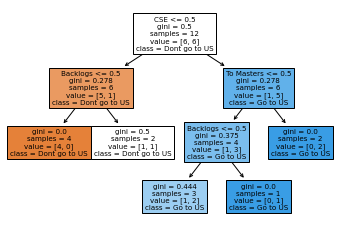

In [59]:
tree.plot_tree(dt,feature_names = inputs, 
               class_names=classes,
               filled = True)

# Question 3

# Strategy 


1) I will convert the input into 2 dimensional array.. just as Tic Tac Toe grid.

2) Then I will check all elemnts in each row and end in each column. If all the elements are equal in a particular row or a particular column and if the value of the element is X (only X coz X is the agent), then agent wins.

3) If all the elements in a particular row or column is not X and they are equal then, agent looses.

4) Likewise I'm also checking the diagonal elements of the array. If they are equal and the element in X then agent wins else agent looses.

5) If none of the above conditions satisfy then it's a draw

In [92]:
def check(a):
    
    for i in range(3):
        
        if (a[i][0]=='X') and (a[i][0] == a[i][1]) and (a[i][1] == a[i][2]):   # cheking all elements in a row
            print(f'Agent wins !!')
            return 1
            
        elif (a[0][i]=='X') and (a[0][i] == a[1][i]) and (a[1][i] == a[2][i]):  # cheking all elements in a column
            print(f'Agent wins !!')
            return 1
           
        elif (a[i][0]!='X') and (a[i][0] == a[i][1]) and (a[i][1] == a[i][2]): 
            print('Agent looses !!')
            return 1
        
        elif (a[0][i]!='X') and (a[0][i] == a[1][i]) and (a[1][i] == a[2][i]):
            print(f'Agent looses !!')
            return 1
        else:
            continue
      
    if (a[1][1] == 'X') and (a[0][0] == a[1][1]) and (a[1][1] == a[2][2]):
        print(f'Agent wins !!')
        return 1
    
    if (a[1][1] != 'X') and (a[0][0] == a[1][1]) and (a[1][1] == a[2][2]):
        print(f'Agent looses !!')
        return 1
    
    if (a[1][1] == 'X') and (a[2][0] == a[1][1]) and (a[1][1] == a[0][2]):
        print(f'Agent wins !!')
        return 1
    
    if (a[1][1] != 'X') and (a[2][0] == a[1][1]) and (a[1][1] == a[0][2]):
        print(f'Agent looses !!')
        return 1
    
    print("It's a draw")
            

In [94]:
string = input('Enter input string\n')
string_to_char = [char for char in string]
to_numpy = np.array(string_to_char).reshape(3,3)
check(to_numpy)

Enter input string
X-O-X-O-X
Agent wins !!


1